## 多图像
创建一组具有单一颜色映射、标准和颜色条的图像。

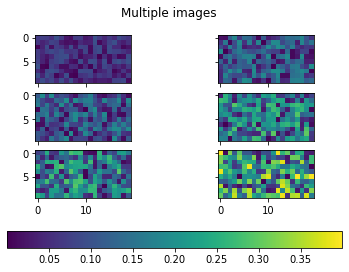

In [2]:
 from matplotlib import colors
 import matplotlib.pyplot as plt
 import numpy as np
 
 np.random.seed(19680801)
 Nr = 3
 Nc = 2
 
 fig, axs = plt.subplots(Nr, Nc)
 fig.suptitle('Multiple images')
 
 images = []
 for i in range(Nr):
     for j in range(Nc):
         # Generate data with a range that varies from one plot to the next.
         data = ((1 + i + j) / 10) * np.random.rand(10, 20)
         images.append(axs[i, j].imshow(data))
         axs[i, j].label_outer()
         
 # Find the min and max of all colors for use in setting the color scale.
 vmin = min(image.get_array().min() for image in images)
 vmax = max(image.get_array().max() for image in images)
 norm = colors.Normalize(vmin=vmin, vmax=vmax)
 for im in images:
     im.set_norm(norm)
     
 fig.colorbar(images[0], ax=axs, orientation='horizontal', fraction=.1)
 
 #让图像响应其他图像的变化(例如通过
#“编辑轴，曲线和图像参数”GUI上的Qt)，但小心不要
#递归无限!

def update(changed_image):
    for im in images:
        if (changed_image.get_cmap() !=im.get_cmap()
                or changed_image.get_clim() != im.get_clim()):
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())
            
            
for im in images:
    im.callbacksSM.connect('changed', update)
    
plt.savefig("image60.png")
plt.show()
 

## 轴的演示
使用fig.add_axes在主绘图轴中创建插入轴的示例。
请参阅坐标轴网格部分，以及以下三个例子:
缩放区域插入轴
插图定位演示
插图定位以及接下来

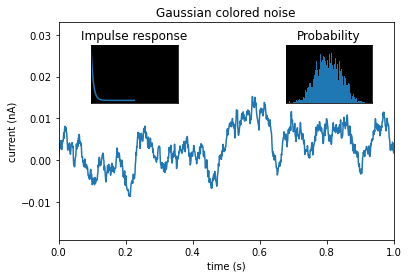

In [3]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801) # Fixing random state for reproducibility.

# create some data to use for the plot 
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000] / 0.05) # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)] * dt # colored noise

fig, main_ax = plt.subplots()
main_ax.plot(t, s)
main_ax.set_xlim(0, 1)
main_ax.set_ylim(1.1 * np.min(s), 2 * np.max(s))
main_ax.set_xlabel('time (s)')
main_ax.set_ylabel('current (nA)')
main_ax.set_title('Gaussian colored noise')

# this is an inset axes over the main axes
right_inset_ax = fig.add_axes([.65, .6, .2, .2], facecolor='k')
right_inset_ax.hist(s, 400, density=True)
right_inset_ax.set(title='Probability', xticks=[], yticks=[])

# this is another inset axes over the main axes
left_inset_ax = fig.add_axes([.2, .6, .2, .2], facecolor='k')
left_inset_ax.plot(t[:len(r)], r)
left_inset_ax.set(title='Impulse response', xlim=(0, 2), xticks=[], yticks=[])

plt.savefig("image51.png")
plt.show()

## 不同尺度的地块
同一轴上的两个地块，但左右尺度不同。
诀窍是使用共享同一x轴的两个不同的轴。您可以使用单独的matplotlib。由于这两个轴是独立的，所以可以根据需要设置股票格式化器和定位器。
这样的轴是通过调用轴来生成的。twinx方法。同样,轴。twiny可以生成共享y轴但顶部和底部比例不同的轴。

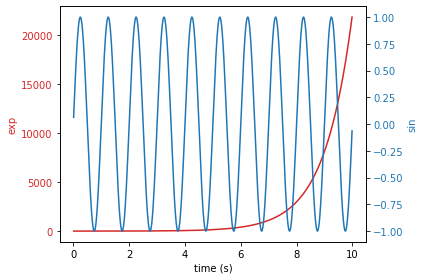

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("image62.png")
plt.show()

## 盒子情节与小提琴情节的比较
注意，虽然小提琴图与Tukey(1977)的箱形图密切相关，但它们添加了有用的信息，如样本数据的分布(密度轨迹)。
默认情况下，箱形图显示1.5 *四分位数范围以外的数据点作为高于或低于须的离群值，而小提琴图显示数据的整个范围。
关于箱线图及其历史的一般参考资料可以在这里找到:http://vita.had.co.nz/papers/boxplots.pdf
小提琴的情节需要matplotlib &gt;= 1.4。
关于小提琴情节的更多信息，scikit-learn文档有一个很好的部分:https://scikit-learn.org/stable/modules/density.html

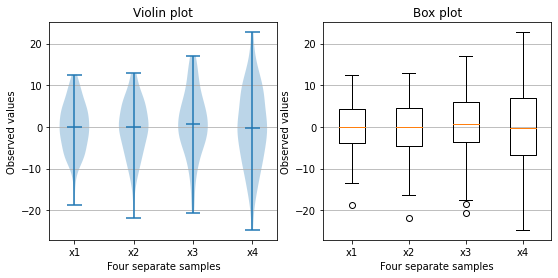

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Fixing  random state for reproducibility
np.random.seed(19680801)

# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axs[0].violinplot(all_data,
                   showmeans=False,
                   showmedians=True)
axs[0].set_title('Violin plot')

# plot box plot
axs[1].boxplot(all_data)
axs[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))])
    ax.set_xlabel('Four separate samples')
    ax.set_ylabel('Observed values')
    
# add x-tick labels
plt.setp(axs, xticks=[y + 1 for y in range(len(all_data))],
          xticklabels=['x1', 'x2', 'x3', 'x4'])
plt.savefig("image63.png")
plt.show()

## 基本的饼状图
一个基本饼状图的演示加上一些附加功能。
除了基本的饼图，这个演示显示了一些可选的功能:
片的标签
auto-labeling百分比
用“爆炸”来抵消一块
下拉阴影
自定义启动角
注意自定义起始角度:
默认的startangle为0，这将在正x轴上开始“青蛙”切片。这个例子设置了startangle = 90，这样所有东西都将逆时针旋转90度，青蛙切片从正y轴开始。

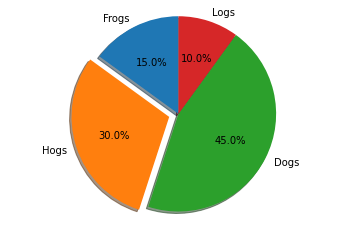

In [9]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)   # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig("image64.png")
plt.show()

## 块馅饼
制作一个“饼状图”，饼状图的第一个切片被“爆炸”成一个条形图，并进一步细分该切片的特征。该示例演示了如何使用带有多个轴集的图形，以及如何使用axes patches列表添加两个ConnectionPatches来链接子图图表。

IndexError: list index out of range

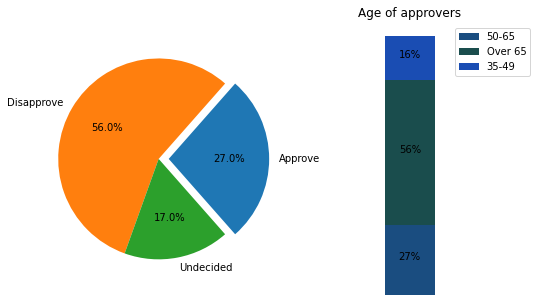

In [12]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [.27, .56, .17]
labels = ['Approve', 'Disapprove', 'Undecided']
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# bar chart parameters

xpos = 0
bottom = 0
rations = [.33, .54, .07, .06]
width = .2
colors = [[.1, .3, .5], [.1, .3, .3], [.1, .3, .7], [.1, .3, .9]]

for j in range(len(rations)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')
             
    ax2.set_title('Age of approvers')
    ax2.legend(('50-65', 'Over 65', '35-49', 'Under 35'))
    ax2.axis('off')
    ax2.set_xlim(- 2.5 * width, 2.5 * width)
    
# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].thetal, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * thetal) + center[0]
y = r * np.sin(np.pi / 180 * thetal) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.savefig("image66.png")
plt.show()

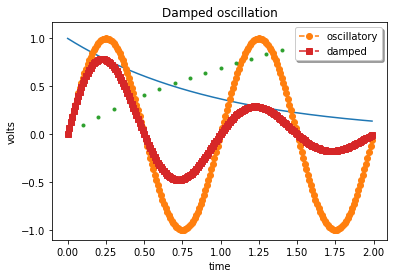

In [13]:
import matplotlib.pyplot as plt
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D
import numpy as np

t1 = np.arange(0.0, 2.0, 0.1)
t2 = np.arange(0.0, 2.0, 0.01)

fig, ax = plt.subplots()

# note that plot returns a list of lines.  The "l1, = plot" usage
# extracts the first element of the list into l1 using tuple
# unpacking.  So l1 is a Line2D instance, not a sequence of lines
l1, = ax.plot(t2, np.exp(-t2))
l2, l3 = ax.plot(t2, np.sin(2 * np.pi * t2), '--o', t1, np.log(1 + t1), '.')
l4, = ax.plot(t2, np.exp(-t2) * np.sin(2 * np.pi * t2), 's-.')

ax.legend((l2, l4), ('oscillatory', 'damped'), loc='upper right', shadow=True)
ax.set_xlabel('time')
ax.set_ylabel('volts')
ax.set_title('Damped oscillation')
plt.savefig("image68.png")
plt.show()